# 과제1
* 가설 :더치페이 요청에 대한 응답률이 높을수록 더치페이 서비스를 더 많이 사용한다. 

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dutch_dt = pd.read_csv('C:/Users/jinlo/Desktop/analysis/Kakao pay/dutchpay_claim_detail.csv')
dutch_dt.head()

,claim_detail_id,claim_id,recv_user_id,claim_amount,send_amount,status
0,12918735,4075714,39476d42bd5f268,4,NaN,CLAIM
1,12918734,4075714,a84a2bf8ab324d3,4,4.0,CHECK
2,12829743,4049182,810b763a8f463a9,11750,NaN,CLAIM
3,12829742,4049182,1fc6c9d423a40ec,11750,NaN,CLAIM
4,12829741,4049182,3fc7171d336cf2f,11750,NaN,CLAIM


In [4]:
dutch = pd.read_csv('C:/Users/jinlo/Desktop/analysis/Kakao pay/dutchpay_claim.csv')
dutch.head()

,claim_id,claim_at,claim_user_id
0,4420721,2020-02-07 15:29:18,5cbd74112c55a0a
1,4420704,2020-02-07 15:26:54,5cbd74112c55a0a
2,4454342,2020-02-10 19:18:31,f077bc4ec8fd0ef
3,4453683,2020-02-10 18:15:11,f077bc4ec8fd0ef
4,4348820,2020-02-01 09:41:30,f077bc4ec8fd0ef


In [5]:
print(len(dutch))
print(len(dutch_dt))

159194
557644


In [6]:
dutch_t=pd.merge(dutch, dutch_dt, on='claim_id', how='inner')
dutch_t.head()

,claim_id,claim_at,claim_user_id,claim_detail_id,recv_user_id,claim_amount,send_amount,status
0,4420721,2020-02-07 15:29:18,5cbd74112c55a0a,14115935,e97b2a81b8cc38e,13000,NaN,CLAIM
1,4420721,2020-02-07 15:29:18,5cbd74112c55a0a,14115933,b76fb84848485e9,13000,NaN,CLAIM
2,4420721,2020-02-07 15:29:18,5cbd74112c55a0a,14115932,5cbd74112c55a0a,13000,13000.0,CHECK
3,4420721,2020-02-07 15:29:18,5cbd74112c55a0a,14115934,c76d85ff6b23d31,13000,13000.0,SEND
4,4420704,2020-02-07 15:26:54,5cbd74112c55a0a,14115887,e97b2a81b8cc38e,13166,NaN,CLAIM


In [7]:
print(len(dutch_t))
dutch_t.info()

557644
<class 'pandas.core.frame.DataFrame'>
Int64Index: 557644 entries, 0 to 557643
Data columns (total 8 columns):
claim_id           557644 non-null int64
claim_at           557644 non-null object
claim_user_id      557644 non-null object
claim_detail_id    557644 non-null int64
recv_user_id       557644 non-null object
claim_amount       557644 non-null int64
send_amount        302013 non-null float64
status             557644 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 38.3+ MB


In [12]:
import datetime

dutch_t['claim_at'] = pd.to_datetime(dutch_t['claim_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')
dutch_t['claim_dt'] = dutch_t['claim_at'].dt.date

#dutch_t.drop(['claim_date'], axis='columns', inplace=True)
dutch_t.head()

,claim_id,claim_at,claim_user_id,claim_detail_id,recv_user_id,claim_amount,send_amount,status,claim_dt
0,4420721,2020-02-07 15:29:18,5cbd74112c55a0a,14115935,e97b2a81b8cc38e,13000,NaN,CLAIM,2020-02-07
1,4420721,2020-02-07 15:29:18,5cbd74112c55a0a,14115933,b76fb84848485e9,13000,NaN,CLAIM,2020-02-07
2,4420721,2020-02-07 15:29:18,5cbd74112c55a0a,14115932,5cbd74112c55a0a,13000,13000.0,CHECK,2020-02-07
3,4420721,2020-02-07 15:29:18,5cbd74112c55a0a,14115934,c76d85ff6b23d31,13000,13000.0,SEND,2020-02-07
4,4420704,2020-02-07 15:26:54,5cbd74112c55a0a,14115887,e97b2a81b8cc38e,13166,NaN,CLAIM,2020-02-07


In [33]:
claim=dutch_t[dutch_t['status']=='CLAIM']
claim_gr=claim.groupby(by=['claim_dt'], as_index=False).count()
claim_res=dutch_t[dutch_t['status']=='SEND']
claim_res_gr=claim_res.groupby(by=['claim_dt'], as_index=False).count()
claim_gr1=claim_gr[['claim_dt','claim_id']]
claim_gr1=claim_gr1.rename({'claim_id' : 'claim_cnt'}, axis='columns')
claim_res_gr1=claim_res_gr[['claim_dt','claim_id']]
claim_res_gr1=claim_res_gr1.rename({'claim_id' : 'claim_res_cnt'}, axis='columns')
claim2=pd.merge(claim_gr1,claim_res_gr1, on='claim_dt', how='inner')

claim2['recv_rate']=round((claim2['claim_res_cnt']/claim2['claim_cnt'])*100,2)
claim2.head()

,claim_dt,claim_cnt,claim_res_cnt,recv_rate
0,2019-12-01,2427,1271,52.37
1,2019-12-02,2979,1783,59.85
2,2019-12-03,2926,1840,62.88
3,2019-12-04,4634,1714,36.99
4,2019-12-05,2887,1901,65.85


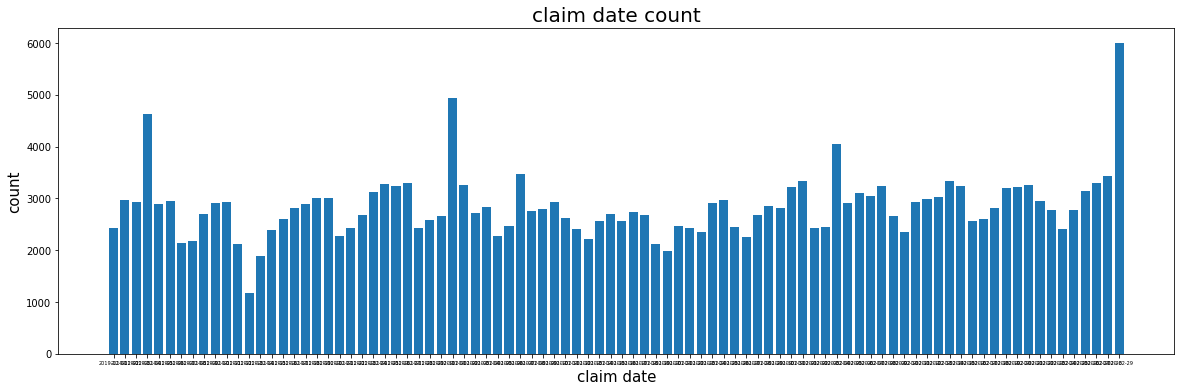

In [34]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [20, 6]

label =claim2['claim_dt']
index = np.arange(len(label))

plt.bar(index,claim2['claim_cnt'])
plt.title('claim date count', fontsize=20)
plt.xlabel('claim date', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(index, label, fontsize=5)
plt.show()

[Text(0,0.5,'rate'), Text(0.5,1,'reciv rate')]

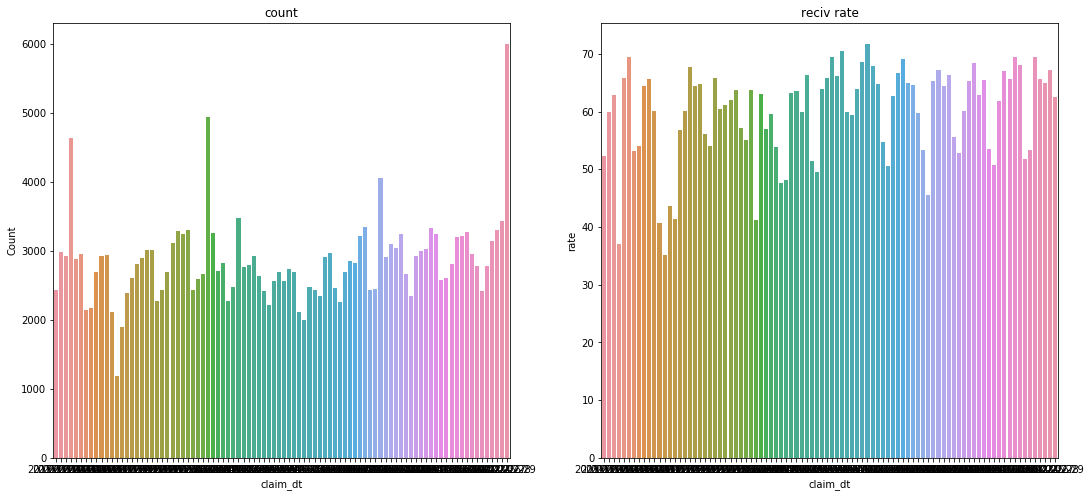

In [35]:
figure,(ax1, ax2)=plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=claim2, x="claim_dt",y="claim_cnt",ax=ax1)
sns.barplot(data=claim2, x="claim_dt",y="recv_rate",ax=ax2)

ax1.set(ylabel='Count', title="count")
ax2.set(ylabel='rate', title="reciv rate")

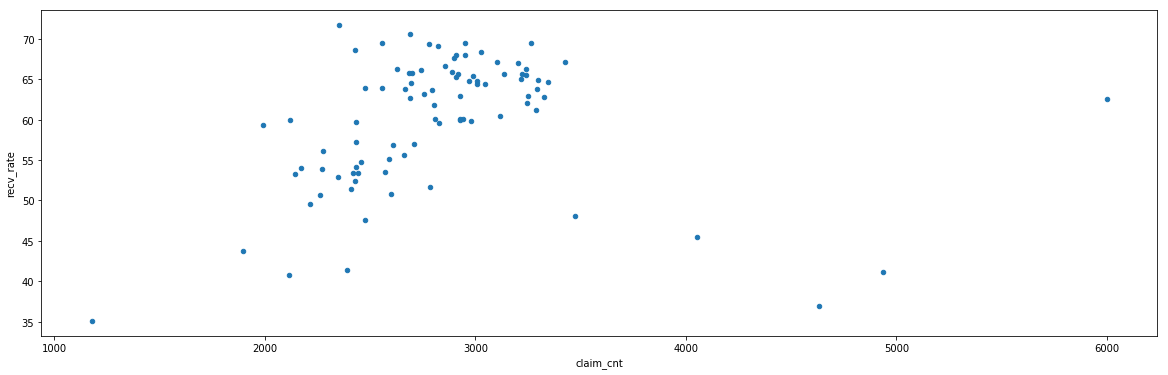

In [36]:
claim2.plot(kind='scatter',x='claim_cnt',y='recv_rate')

In [37]:
claim2.corr(method='pearson')

,claim_cnt,claim_res_cnt,recv_rate
claim_cnt,1.000000,0.822175,0.140848
claim_res_cnt,0.822175,1.000000,0.656770
recv_rate,0.140848,0.656770,1.000000


# 결론
 * 일별 요청 응답율과 사용(요청)건수에 대한 상관계수는 0.14로 낮으므로 상관이 있다고 할 수 없다. 
 * 요청건수가 증가할수록, 응답건수도 같이 증가하는 경향성은 있으나, 율이 같이 증가한다고 할수는 없다